# CMSE Homework 02

<img src="https://imgs.xkcd.com/comics/extrapolating.png" width=400px>

We are supposed to be about building models for data in CMSE202. Here we are going to practice some very basic model building, linear regression, using data from a spreadsheet (building on our work from HW-01)
By the end of this assignment, you should be able to:

* Use Git to create a repository, track changes to the files within the repository, and push those changes to a remote repository.
* Get more experience with Pandas using excel spread sheets.
* Make plots of your model using matplotlib.
* Use some new libraries to help develop models of your data

### Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are 25 points possible on this assignment. Point values for each part are included in the section headers.

This assignment is due roughly two weeks from now at 11:59 pm on Friday, Frebruaray 7th. It should be uploaded into the "Homework Assignments" submission folder for Homework #2 in your D2L webpage. Submission instructions can be found at the end of the notebook.

**Hint**: It is possible you are asked to do something you are not familiar with. That's why you have internet access. Do some smart searches and see what you can find! 

As an aside, a version of this homework was used as a final exam in the course. 

---
## Part 1: Setting up a repository for tracking changes (3 points)

For this assignment, you're going to add it to the cmse202-s20-turnin repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to:

* Navigate to your `cmse202-s20-turnin` repository and create a new directory called `hw-02`.
* Move this notebook into that new directory in your repository, then add it and commit it to your repository.
 * Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

Important: Make sure you've added your PTA as a collaborators\ to your "turnin" respository with "Read" access so that we can see your assignment.

* Section 001: nchamusah14
* Section 002: nchamusah14
* Section 003: genster6

Also important: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, none of your changes will be tracked.

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s20-turnin` repository under the `hw-02` directory that you just created. Periodically, you'll be asked to commit your changes to the repository and push them to the remote GitHub location. Of course, you can always commit your changes more often than that, if you wish. It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

## Part 2: Working with Example Data (6 points)

You all want to eat a healthy breakfast, don't you? Well, this is a list of cereals and their various "properties" such as sodium content, fat content, etc. Associated with each cereal is a rating indicating its healthfullness. There are 77 cereals and 16 fields associated with each cereal in a provided excel spreadsheet called `cereal.xlsx`. This is the data you will work with.

For this homework we ask you to develop a model, based on linear regression, of some of the cereal properties and their ratings

**Important Note** It is possible that you could modify the spreadsheet to make it easier to work with. **Don't** We will test your code on the original spreadsheet provided. Any changes should be made programmatically.

### Part 2.1  Reading in the spreadsheet (3 points)


Take a look at the spreadsheet provided using excel and read it into a dataframe. Here are some features you should deal with when you load it (much as you did in HW-01)

* The 2nd row contains information about the type of data in the column below. It should be removed when you read the sheet into a dataframe 
* Some of the data is `Categorical`, that is the column has data which is not numeric. Those columns should be removed when you read in the sheet to a dataframe

The column with the header `rating` is the dependent variable, indicating healthfulness. 

Having read in all the data, in data provide the following information concerning `rating`:

* the max
* the min
* the mean
* the median
* a histogram (using any tool you like) of the distribution of `rating` values

In [1]:
## your code here
#####################################################################
import pandas as pd
import matplotlib.pyplot as plt 
import math 
import numpy as np
import seaborn as sns 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#####################################################################
ceral = pd.read_excel("cereal.xlsx",usecols=["rating"], skiprows=[1])
ceral.describe()
ceral.plot.hist()

### Part 2.2 Clean the Data (3 points)

There are some locations in the data where a `-1` value is used. This indicates that there is no data available for that particular cell (it was missing in the data, not entered properly, something). 

There are various approaches we could take, but for now we are going to ignore any row (any particular cereal) that has a `-1` value for one of the columns. That is, we are going to drop that row. You can do this any way you feel comfortable, but below is a **suggestion** on how to approach it.

Make a new data frame called `clean` that has any row with a `-1` removed. Here is a general strategy (but feel free to do as you like):
* iterate through the rows
* iterate through each cell in a row
* if a cell has a `-1` value remember the index of that row (in a list of `bad_rows`)
* after you have collected all the bad rows (and make sure you have only one index for a row, perhaps there are multiple bad values in one row), use the `drop` method and create the now cleaned data frame

After you are done, print the now cleaned data frame (show the data frame)

In [2]:
## your code here
OG_cereal = pd.read_excel("cereal.xlsx",skiprows=[1])
bad_rows = []
for i,j in OG_cereal.iterrows():
    for k in j:
        if (k ==-1):
            bad_rows.append(i)
bad_rows = list(set(bad_rows))
print(bad_rows)
clean_cereal = OG_cereal.drop(bad_rows)
clean_cereal = clean_cereal.drop(["mfr","type" ],axis =1)
clean_cereal

[57, 4, 20]


,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
5,Apple Cinnamon Cheerios,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813
10,Cap'n'Crunch,120,1,2,220,0.0,12.0,12,35,25,2,1.00,0.75,18.042851


## Part 3: Analyzing the data (10 points)


### Part 3.1 Correlation (3 pts)
We now have clean data with only numeric elements (except for the cereal names of course). Lets make a heat map of the correlations between the remaining fields of our clean data.

As hints:
* pandas has the ability to generate the correlation matrix
* seaborn is a package that can help with heatmaps

* You may have to do a little work to make the heatmap readable (big enough, fonts clear, etc.). 
* The correlation values should show up in the heat map. 
* You can round to make the values readable.


<Figure size 432x288 with 0 Axes>

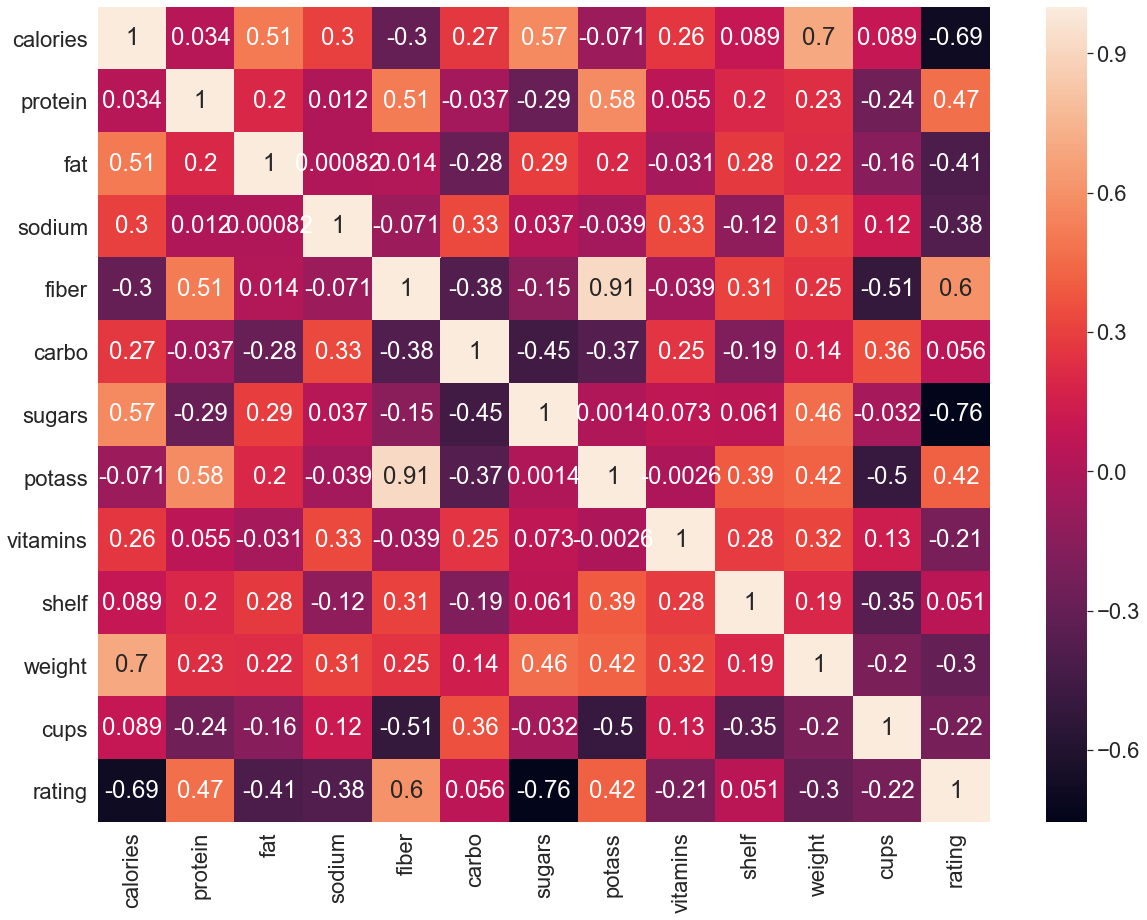

In [3]:
## your code here
clean_cereal.corr()
plt.figure(1)
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.heatmap(clean_cereal.corr(), annot=True)


### 3.2 Best independent variable (1 pt)

The correlation matrix values range from 1.0 (a value perfectly correlated) to -1.0 (perfectly anti-correlated). We would like to find a variable that is best correlated (or anti-correlated) with `rating`. Looking at our heatmap, please select the independent variable that has the best correlation with the dependent variable `rating`. Please **write in the cell below** that variable you will work with below **and explain why**

<img src="https://3.bp.blogspot.com/-i-4_PJncM9Y/UPKZWigjWtI/AAAAAAAAAGw/RcMBVqvETeE/s1600/yellow_star-1331px.png" align="left" width=35px> **Your answer in this cell**: 
with fiber its 0.6;  with suger its -0.76.  Sugar has best correlation.

Having selected an independent variable, let us do a linear regression using your selected variable (lets just call it `x`) and the `rating` variable (let's just call that `y`). While you can do as you wish, I would suggest working with various submodules of `sklearn`

### Part 3.3 (3 points)

Create two new `DataFrame` using  your selected `x` and `y` values from above, create a linear regression model of the data and print the slope and intercept values you found

the slope is: -2.4337200139700754  and the y-intercept is 59.670931896598084


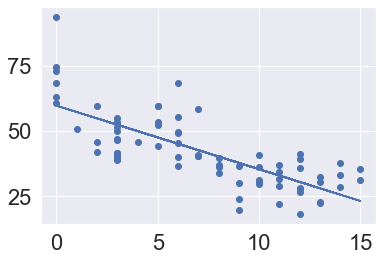

In [4]:
# your code here
#########################
#     x = sugars
#     y = Rating
#
#
########################
x = clean_cereal['sugars']
y = clean_cereal['rating']
x_arr = np.array(x)
y_arr = np.array(y)
fitter = np.polyfit(x_arr,y_arr,1)
plter = np.poly1d(fitter)
fitter
print("the slope is:", fitter[0]," and the y-intercept is", fitter[1])
plt.scatter(x_arr,y_arr, label="orginal x and y data")
plt.plot(x_arr, plter(x_arr), label= "polyfit x and y")


### Part 3.4 (3 points)

- For the `x` data, use the linear regression model to create a prediction set, call it `y_predict`. 
- Using the `y` and `y_predict` values, report the `mean squared error` and the $r^{2}$ value (also called the `coefficient of determination`). 
   - sklearn can help with these two values, look it up
- Plot the `x` and `y` cleaned data from the spreadsheet **as well as** the linear regression line

83.25674924402026 0.571468096417157


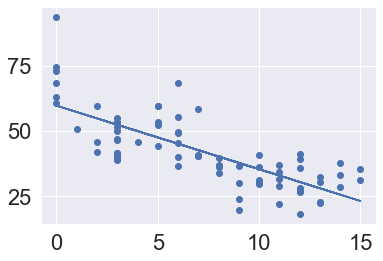

In [5]:
## your code here
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
x_DF = pd.DataFrame(clean_cereal['sugars'])
y_DF = pd.DataFrame(clean_cereal['rating'])
#
reg_ = linear_model.LinearRegression()
#
reg_fit=reg_.fit(x_DF,y_DF["rating"])
y_predict = reg_.predict(x_DF)
##
MSE = mean_squared_error(y_DF["rating"],y_predict)
CD = r2_score(y_DF["rating"],y_predict)
print(MSE, CD)

plt.scatter(x_DF["sugars"],y_DF["rating"])
plt.plot(x_DF["sugars"],y_predict)


<img src="https://3.bp.blogspot.com/-i-4_PJncM9Y/UPKZWigjWtI/AAAAAAAAAGw/RcMBVqvETeE/s1600/yellow_star-1331px.png" align="left" width=35px> **Time to push your changes to your github repository and then carry on**

## Part 4: Doing it yourself (6  points)


### Part 4.1 Least Squares yourself (3 points)
Let's do some of that work ourselves to see if we can reproduce those results. We are going do the math for linear regression and see if our math agrees with the tools we used above. Below is the math. We'll use the same `x` and `y` variables you chose above.

Let's assume that the symbols $\bar{x}$ and $\bar{y}$ represent the means of those arrays and that `n` is the number of elements.

Here's the calculation for the slope
$$ slope = \frac {\sum_{i=1}^{n}{(x_i - \bar{x}) * (y_i - \bar{y}) } } {\sum_{i=1}^{n}{(x_i - \bar{x})^2}}$$

Here's the calculation for the intercept
$$ intercept = \bar{y} - slope*\bar{x} $$


Using the same independent variable and dependent variables above, calculate the slope and intercept of the best fit least squares using the formula provided. Print:
- the slope
- the intercept
- plot the same `x`,`y` data you used above and 
- plot the new regression line through that data using your **calculated slope and intercept**

-2.4337200139700705 59.67093189659806


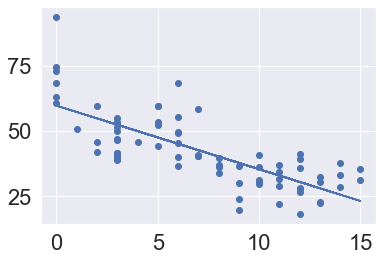

In [6]:
## your code here
##############
x_mean = x_arr.mean()
x_size = x_arr.size

##############
y_mean = x_arr.mean()
y_size = x_arr.size

#Intercept and slope 
num = 0
dem = 0 
sugar = np.array(x_DF["sugars"])
x_mean = sugar.mean()
x_size = sugar.size
rate = np.array(y_DF["rating"])
y_mean = rate.mean()
y_size = rate.size


for i in range(x_size):
    num += ((sugar[i]-x_mean)*(rate[i]-y_mean))
    dem += ((sugar[i]-x_mean)**2)
    
    
    
slope = num/dem
#print(num,"/",dem)
inter = y_mean - (slope*x_mean)
print("the slope is"slope,"the intercept is ", inter)
plt.scatter(x_DF["sugars"],y_DF["rating"])
y_pred_man = slope * x_DF["sugars"] + inter
plt.plot(sugar,y_pred_man)

### Part 4.2 Coefficient of Determination and Mean-Squared Error (3 points)

The coefficient of determination calculations are as follows:

Total sum of squares is:
$$ tsum = \sum_{i=1}^{n}{(y_i - \bar{y})^{2}} $$

Residual sum of squares is:
$$ residual = \sum_{i=1}^{n}{(y_i - y_{predicted})}^{2} $$

Mean-squared error is just $$ MSE = \frac{1}{n} * residual$$ or $$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - y_{predicted})}^{2} $$

The coefficient of determination is:
$$ cod = 1 - \frac{residual}{tsum} $$

Using the same `x` and `y` data you used above, develop a new `y_predict`  based on your **calculated slope and intercept** and provide the coefficient of determination and mean-squared error of your calculated regression model.

In [7]:
## your code here
#########################
#   sugar = x
#   x_mean
#   x_size
#   rate = y 
#   y_mean
#   y_size
###################

########################
#summation results 
Tsum = 0
residual = 0
MSE = 0

#####################
cod = 0




######Tsum
for t in range(1,x_size):
    Tsum +=((rate[i]- y_mean)**2)
    residual +=((rate[i] - y_pred_man[i])**2)
    #print(Tsum,residual)
    

MSE = residual/x_size
cod = 1-(residual/Tsum)
print(MSE,cod)

32.29056271120928 0.1441187803593018


### You're Finished!

<img src="https://3.bp.blogspot.com/-i-4_PJncM9Y/UPKZWigjWtI/AAAAAAAAAGw/RcMBVqvETeE/s1600/yellow_star-1331px.png" align="left" width=35px> Time to push your changes to your github repository when you finish


<img src="https://3.bp.blogspot.com/-i-4_PJncM9Y/UPKZWigjWtI/AAAAAAAAAGw/RcMBVqvETeE/s1600/yellow_star-1331px.png" align="left" width=35px> Make sure you also turn in your completed notebook to the D2L assignment labeled `Homework 02`. We will be checking github but grading the notebooks submitted to D2L.

